In [ ]:
#IMPORT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor, LinearRegression

In [ ]:
pd.options.mode.chained_assignment = None 

In [ ]:
def plot_cost(cost):
  plt.plot(cost_history, 'b-')
  plt.xlabel(xlabel='Iterations')
  plt.ylabel(ylabel='Cost')
  plt.show()

In [ ]:
def outlier(df, col_name):
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  low_fence = Q1 - 1.5*IQR
  up_fence = Q3 + 1.5*IQR

  df = df[~((df[col_name] < low_fence) | (df[col_name] > up_fence))]
  return df

In [ ]:
def load_data_fish():
  df = pd.read_csv('/content/drive/MyDrive/data/fish.csv')

  # Outlier
  cols_name_outlier = ['Length1', 'Length2', 'Length3', 'Weight']
  for col in cols_name_outlier:
    df = outlier(df, col)

  # Select features and target
  features = df.columns[2:]
  X = df.loc[:, features]
  y = df.loc[:, ['Weight']]
  
  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=257)

  # Standardizing data
  standard_scaler = StandardScaler()
  X_train = standard_scaler.fit_transform(X_train)
  X_test = standard_scaler.fit_transform(X_test)

  y_train = standard_scaler.fit_transform(y_train)
  y_test = standard_scaler.fit_transform(y_test)

  # Convert y to 1D
  y_train = y_train.ravel()
  y_test = y_test.ravel()

  return X_train, X_test, y_train, y_test

In [ ]:
def load_data_wine():
  df = pd.read_csv('/content/drive/MyDrive/data/wine.csv')


  cols_name = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 
  # Outlier
  for col in cols_name:
    df = outlier(df, col)

  # Select features and target
  features = df.columns[:11]
  X = df.loc[:, features]
  y = df.loc[:,['quality']]


  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=257)

  # Standardizing data
  standard_scaler = StandardScaler()
  X_train = standard_scaler.fit_transform(X_train)
  X_test = standard_scaler.fit_transform(X_test)
  
  y_train = standard_scaler.fit_transform(y_train)
  y_test = standard_scaler.fit_transform(y_test)

  # Convert y to 1D
  y_train = y_train.ravel()
  y_test = y_test.ravel()

  return X_train, X_test, y_train, y_test 

In [ ]:
def load_data_weather():
  df = pd.read_csv('/content/drive/MyDrive/data/weather.csv')
  onehot_encoder = OneHotEncoder(sparse=False)
  new_description = onehot_encoder.fit_transform(df[['Description']])
  description_column = pd.DataFrame(data=new_description, columns=onehot_encoder.get_feature_names(['Description']))
  new_df = pd.concat([df.drop(columns=['Description']),description_column], axis=1)

  # Outliers
  cols_name_outlier = ['Temperature_c', 'Humidity']
  for col in cols_name_outlier:
    new_df = outlier(new_df, col)
    
  # Select features and target
  features = new_df.columns[1:]
  X = new_df.loc[:,features]
  y = new_df.loc[:, ['Temperature_c']]

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=257)

  # Standardizing data
  cols_name = ['Humidity','Wind_Speed_kmh','Wind_Bearing_degrees','Visibility_km','Pressure_millibars']

  standard_scaler = StandardScaler()

  for col in cols_name:
    X_train.loc[:,col] = standard_scaler.fit_transform(X_train.loc[:,[col]])
    X_test.loc[:,col] = standard_scaler.fit_transform(X_test.loc[:,[col]])
  
  y_train = standard_scaler.fit_transform(y_train)
  y_test = standard_scaler.fit_transform(y_test)
  # Convert y to 1D
  y_train = y_train.ravel()
  y_test = y_test.ravel()

  return X_train, X_test, y_train, y_test

In [ ]:
def load_data_insurance():
    df = pd.read_csv('/content/drive/MyDrive/data/insurance.csv')

    # ENCODE DATA
    onehot_encoder = OneHotEncoder(sparse=False)
    label_encoder = LabelEncoder()
    
    new_region = onehot_encoder.fit_transform(df[['region']])

    region_column = pd.DataFrame(data=new_region, columns=onehot_encoder.get_feature_names(['region']))
    new_df = pd.concat([region_column, df.drop(columns=['region'])], axis=1)

    new_df['sex'] = label_encoder.fit_transform(new_df['sex'])
    new_df['smoker'] = label_encoder.fit_transform(new_df['smoker'])

    # Outliers
    cols_name_outlier = ['bmi']
    for col in cols_name_outlier:
        new_df = outlier(new_df, col)

    # Select features and target
    features = new_df.columns[0:9]
    X = new_df.loc[:, features]
    y = new_df.loc[:, ['charges']]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=257)

    # Standardizing data
    cols_name = ['age','bmi']
    standard_scaler = StandardScaler()

    for col in cols_name:
        X_train.loc[:,col] = standard_scaler.fit_transform(X_train.loc[:,[col]])
        X_test.loc[:,col] =  standard_scaler.fit_transform(X_test.loc[:,[col]])
    
    y_train = standard_scaler.fit_transform(y_train)
    y_test = standard_scaler.fit_transform(y_test)

    # Convert y to 1D
    y_train = y_train.ravel()
    y_test = y_test.ravel()


    return X_train, X_test, y_train, y_test

In [ ]:
#CLASS LINEAR REGRESSION

class class_LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        cost_history = []

        # Gradient descent
        for i in range(self.n_iters):

            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            cost = self.cost_function(n_samples, y, y_predicted)

            if i % (self.n_iters / 10) == 0 or i == self.n_iters - 1:
              print("Cost after iteration {}: {}".format(i, cost))
              
            cost_history.append(cost)
        return cost_history

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

    def cost_function(self, n, y_orig, y_pred):
        return (1 / n) * np.sum(((y_pred-y_orig) ** 2))

Cost after iteration 0: 1.0000000000000002
Cost after iteration 10: 0.4767666092501485
Cost after iteration 20: 0.2647769535382156
Cost after iteration 30: 0.1786582513933638
Cost after iteration 40: 0.1434562642659071
Cost after iteration 50: 0.12886281494596954
Cost after iteration 60: 0.12262175898257344
Cost after iteration 70: 0.11977611725370457
Cost after iteration 80: 0.11832032126061984
Cost after iteration 90: 0.11744226080256653
Cost after iteration 99: 0.11686895663101661
MSE =  0.09917405440144621
R2 SCORE =  0.9008259455985539


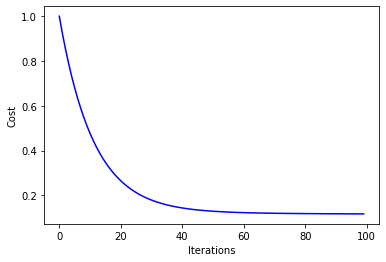

In [ ]:
X_train, X_test, y_train, y_test = load_data_fish()

model = class_LinearRegression(learning_rate=0.01, n_iters=100)
cost_history = model.fit(X_train, y_train)    

predictions = model.predict(X_test)

print('MSE = ', mean_squared_error(y_test, predictions))
print('R2 SCORE = ', r2_score(y_test, predictions))

plot_cost(cost_history)


In [ ]:
# NORMAL EQUATION
X_train, X_test, y_train, y_test = load_data_fish()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 SCORE = ', r2_score(y_test, y_pred))

MSE =  0.09802900574483045
R2 SCORE =  0.9019709942551696


In [ ]:
# STOCHASTIC GRADIENT DESCENT
X_train, X_test, y_train, y_test = load_data_fish()

model = SGDRegressor(l1_ratio=0, max_iter=20, tol=None,  
                     random_state=25, learning_rate='constant', eta0=0.01)
                                 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 SCORE = ', r2_score(y_test, y_pred))

MSE =  0.10918095856860173
R2 SCORE =  0.8908190414313983


Cost after iteration 0: 0.9999999999999999
Cost after iteration 50: 0.3719651493758802
Cost after iteration 100: 0.26723701091215724
Cost after iteration 150: 0.24512033198699118
Cost after iteration 200: 0.2404154492548745
Cost after iteration 250: 0.2394115122905971
Cost after iteration 300: 0.2391970040844014
Cost after iteration 350: 0.239151142870044
Cost after iteration 400: 0.23914133501576124
Cost after iteration 450: 0.23913923720227645
Cost after iteration 499: 0.2391387922879054
MSE =  0.2777165143233185
R2 SCORE =  0.7222834856766815


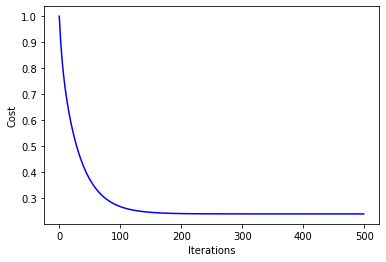

In [ ]:
X_train, X_test, y_train, y_test = load_data_insurance()

model = class_LinearRegression(learning_rate=0.1, n_iters=500)
cost_history = model.fit(X_train, y_train)    

predictions = model.predict(X_test)

print('MSE = ', mean_squared_error(y_test, predictions))
print('R2 SCORE = ', r2_score(y_test, predictions))


plot_cost(cost_history)

In [ ]:
# NORMAL EQUATION
X_train, X_test, y_train, y_test = load_data_insurance()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 SCORE = ', r2_score(y_test, y_pred))

MSE =  0.27828855327320545
R2 SCORE =  0.7217114467267945


In [ ]:
# STOCHASTIC GRADIENT DESCENT
X_train, X_test, y_train, y_test = load_data_insurance()

model = SGDRegressor(l1_ratio=0, max_iter=20, tol=None,  
                     random_state=42, learning_rate='constant', eta0=0.01)
                                 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 SCORE = ', r2_score(y_test, y_pred))

MSE =  0.2779177021626739
R2 SCORE =  0.722082297837326


Cost after iteration 0: 0.9999999999999998
Cost after iteration 100: 0.4176156206587952
Cost after iteration 200: 0.31415546621151474
Cost after iteration 300: 0.26287105035483077
Cost after iteration 400: 0.22902952773975005
Cost after iteration 500: 0.20505867499482033
Cost after iteration 600: 0.18763267980211623
Cost after iteration 700: 0.17480175607994278
Cost after iteration 800: 0.16528130737062396
Cost after iteration 900: 0.1581795540833594
Cost after iteration 999: 0.1529065988927803
MSE =  0.14974699115900203
R2 SCORE =  0.850253008840998


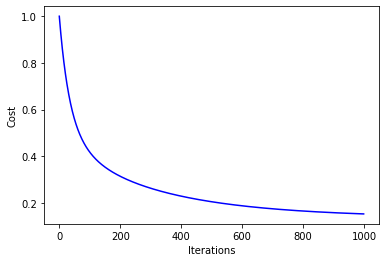

In [ ]:
X_train, X_test, y_train, y_test = load_data_weather()

model = class_LinearRegression(learning_rate=0.01, n_iters=1000)
cost_history = model.fit(X_train, y_train)    

predictions = model.predict(X_test)

print('MSE = ', mean_squared_error(y_test, predictions))
print('R2 SCORE = ', r2_score(y_test, predictions))


plot_cost(cost_history)

In [ ]:
# NORMAL EQUATION
X_train, X_test, y_train, y_test = load_data_weather()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 SCORE = ', r2_score(y_test, y_pred))

MSE =  0.13278195887091343
R2 SCORE =  0.8672180411290865


In [ ]:
# STOCHASTIC GRADIENT DESCENT
X_train, X_test, y_train, y_test = load_data_weather()

model = SGDRegressor(l1_ratio=0, max_iter=20, tol=None,  
                     random_state=25, learning_rate='constant', eta0=0.01)
                                 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 SCORE = ', r2_score(y_test, y_pred))

MSE =  0.13560207501927005
R2 SCORE =  0.8643979249807299


Cost after iteration 0: 1.0
Cost after iteration 50: 0.6861653673294887
Cost after iteration 100: 0.6402169180439039
Cost after iteration 150: 0.6302205861863274
Cost after iteration 200: 0.6266534175848804
Cost after iteration 250: 0.6248879185126551
Cost after iteration 300: 0.623865741474838
Cost after iteration 350: 0.6232191012187084
Cost after iteration 400: 0.6227814741591927
Cost after iteration 450: 0.622467511056342
Cost after iteration 499: 0.6222348235704002
MSE =  0.6521083232270976
R2 SCORE =  0.34789167677290245


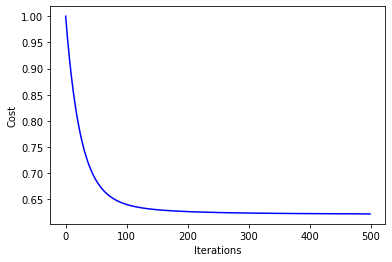

In [ ]:
X_train, X_test, y_train, y_test = load_data_wine()

model = class_LinearRegression(learning_rate=0.01, n_iters=500)
cost_history = model.fit(X_train, y_train)    

predictions = model.predict(X_test)

print('MSE = ', mean_squared_error(y_test, predictions))
print('R2 SCORE = ', r2_score(y_test, predictions))


plot_cost(cost_history)

In [ ]:
# NORMAL EQUATION
X_train, X_test, y_train, y_test = load_data_wine()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 SCORE = ', r2_score(y_test, y_pred))

MSE =  0.6495609591606759
R2 SCORE =  0.3504390408393241


In [ ]:
# STOCHASTIC GRADIENT DESCENT
X_train, X_test, y_train, y_test = load_data_wine()

model = SGDRegressor(l1_ratio=0, max_iter=20, tol=None,  
                     random_state=25, learning_rate='constant', eta0=0.01)
                                 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 SCORE = ', r2_score(y_test, y_pred))

MSE =  0.6756021889391494
R2 SCORE =  0.32439781106085064
